In [28]:
# 계층적 군집 분석 코드를 작성해보자
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
hannanum = Hannanum()

In [29]:
# 데이터 불러오기
data = pd.read_csv(
    "../data/군집분석데이터.csv",
    engine="python",
    encoding="euc-kr"
)
data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [30]:
# 계층적 군집 분석의 코드를 작성해보자!
docs = [hannanum.nouns(i) for i in data["기사내용"]]
docs = list(map(lambda x:"".join(x), docs))

vec = CountVectorizer()
x = vec.fit_transform(docs)
x

<15x113 sparse matrix of type '<class 'numpy.int64'>'
	with 123 stored elements in Compressed Sparse Row format>

In [7]:
df = pd.DataFrame(x.toarray(),
                  columns=vec.get_feature_names())
df

C:\Users\student\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,12억500달러기술수출규모12억5500달러,12억5500만달러,1군발암물질분류라돈방사선때문미국환경보호국,1라운드통과기분소감이축음기버블버블가왕대적하기마지막대결축음기박정현미아폭발적성량가창력열창이승환천일선곡버블버블이승환리깨끗음색모두빠져들투표결과축음기승리가면버블버블정체가수라디달콤한러브송장인라디는이미지축음기도전가왕왕밤빵첫번가왕방어전무대그선택곡이적그가왕답게첫소절특유허스키목소리노래청중단탄성무대김현철장점곡이었다,29,2일발족원안위,4일방송,5000만얀센한국제외전세계레이저티닙개발제조상업화독점적권리국내개발상업화권리유한양행유유한양행얀센내년레이저티닙단일요법병용요법글로벌임상시험공동진행계획레이저티닙경구용3세대상피세포성장인자수용체타이로신인산화효소,5000이번계약얀센전세계레이저티닙개발제조상업화독점적권리국내개발상업화권리유한양행유유한양행얀센바이오텍내년레이저티닙단일요법병용요법글로벌임상시험공동진행예정유한양행개발허가상업화성공단계별마일스톤기술료12억500달러,520bq,...,출연주목데뷔2005년,침대매트리스이온수매트라돈검출소식가정곳곳라돈검출우려불식이라돈측정기사용주민대구경우대구시8월가정용라돈측정기대대여료1천원대구시당시가정용라돈측정기50대구입8개구청군청신분증지참신청서작성사용료1천원선납한뒤1박2일간수라돈측정기벽,침대생리대마스크등라돈검출발암물질,트렌디한음색안정감평가투표결과축음기승리가면조커정체워너원이대휘이날판정단미주이대휘정체알아맞춰눈길김성주그소감이대휘사람들아이돌저가수능력것2라운드에서북극곰버블버블대결무대북금곰빅마마폭발적북극곰무대버블버블무대크러쉬감미북극곰매력무대카버블버블무대이승환것극찬대결결과버블버블60표승리복면북극곰정체감성발라더이기찬그3년재출연결정한이유,폐암,프로젝트명yh25448,하이젠온수매트라돈온수매트언급온라인커뮤니티하이젠온수매트구매후아이기침골자게시물업로드시선글쓴이라돈아이대측정결과하이젠온수매트라돈16,한달동안측정정상수치때문문제않는다,한미약품사노피기술이전계약체결이후2번계약규모말,한화약1조3416억원계약금5000만달러개발허가매출단계별마일스톤12억500만달러수령예정경상기술료순매출액책정유한양행관계자기술이전계약수익식임상시험허가등성공여부수미실현가능성
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# ward 거리
# - 두 군집이 하바쳐졌을 때의 오차 제곱합의 증가분에 기반을 두어 측정
# - 이상치(Outlier)나 잡음(Noise)에 덜 만감하여 비슷한 크기의 군집끼리 묶어주는 경향이 있음

cluster = AgglomerativeClustering(n_clusters=3,
                                  linkage="ward")
cluster.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1], dtype=int64)

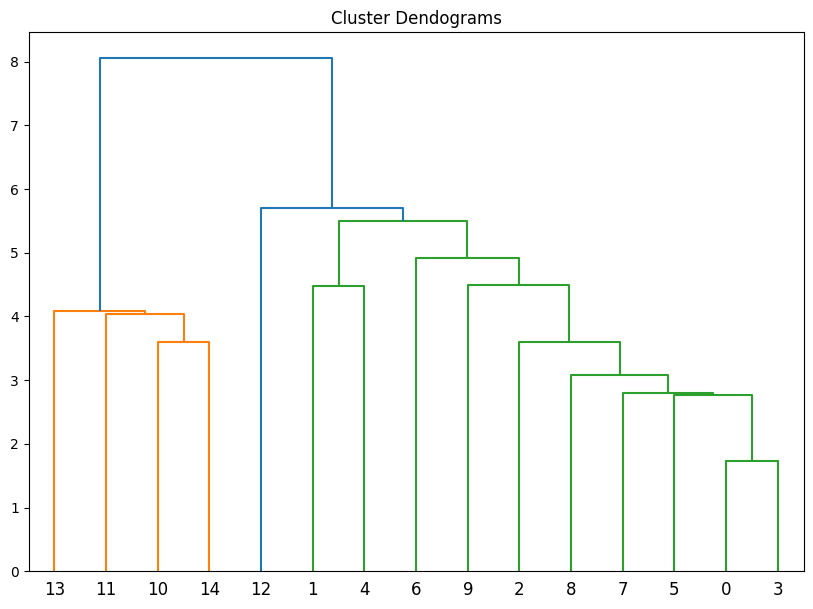

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Cluster Dendograms")
dend = shc.dendrogram(shc.linkage(df, method="ward"))

In [11]:
# K-평균 군집화의 코드를 작성해보자.
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
hannanum = Hannanum()

In [12]:
# 데이터 받기
data = pd.read_csv(
    "../data/군집분석데이터.csv",
    engine="python",
    encoding="euc-kr"
)
data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [14]:
# 계층적 군집 분석의 코드를 작성해보자!
docs = [hannanum.nouns(i) for i in data["기사내용"]]
docs = list(map(lambda x:"".join(x), docs))

vec = CountVectorizer()
x = vec.fit_transform(docs)

df = pd.DataFrame(x.toarray(),
                  columns=vec.get_feature_names())

C:\Users\student\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
kmeans = KMeans(n_clusters=3).fit(df)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0])

In [18]:
# 주성분 코드를 작성해보자.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(
    data=principal_components,
    columns=["PC1", "PC2"]
)
principal_df

,PC1,PC2
0,-0.783533,-0.349263
1,-1.350473,1.409434
2,-1.020920,0.242409
3,-0.761331,-0.326918
4,-1.614895,2.679351
5,-0.784221,-0.351033
6,-1.087269,-1.221280
7,-0.784221,-0.351033
8,-0.809284,-0.381215
9,-1.001285,-0.787459


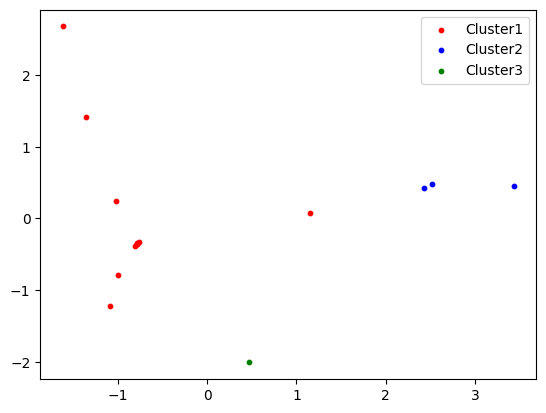

In [23]:
principal_df.index = data["검색어"]

plt.scatter(principal_df.iloc[kmeans.labels_ == 0, 0],
           principal_df.iloc[kmeans.labels_ == 0, 1],
           s=10,
           c="red",
           label="Cluster1")

plt.scatter(principal_df.iloc[kmeans.labels_ == 1, 0],
           principal_df.iloc[kmeans.labels_ == 1, 1],
           s=10,
           c="blue",
           label="Cluster2")

plt.scatter(principal_df.iloc[kmeans.labels_ == 2, 0],
           principal_df.iloc[kmeans.labels_ == 2, 1],
           s=10,
           c="green",
           label="Cluster3")
plt.legend()

In [24]:
# K-대푯값 군집화의 코드를 작성해보자!
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids

In [25]:
# K-대푯값 군집화의 코드를 작성해보자!
kmedoids_insstance = kmedoids.kmedoids(
    df.values,
    initial_index_medoids=np.random.randint(15, size=3)
)
kmedoids_insstance.process()
cluster = kmedoids_insstance.get_clusters()
cluster

[[0, 1, 2, 3, 5, 6, 7, 8, 9, 12], [4], [10, 11, 13, 14]]